# Hypothesis 3 : Home Track Boost the Chance of Podium (2000-2024)

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Extracting race results from all races from 2000-2024
all_results = []
for year in range(2000, 2025):
    for round in range(1, 27):
        url = f"https://ergast.com/api/f1/{year}/{round}/results.json"
        response = requests.get(url)
        data = json.loads(response.text)
        # Extract raceName, season, and circuitId
        if data['MRData']['RaceTable']['Races']:
          race_info = data['MRData']['RaceTable']['Races'][0]
          raceName = race_info['raceName']
          season = race_info['season']
          circuitId = race_info['Circuit']['circuitId']

          results = race_info['Results']
          # Iterate through results and add raceName, season, and circuitId
          for result in results:
              result['raceName'] = raceName
              result['season'] = season
              result['circuitId'] = circuitId
          all_results.extend(results)

df_results = pd.DataFrame(all_results)

In [ ]:
# Extract driver information
df_results[['Driver_givenName', 'Driver_familyName', 'Driver_nationality',
           'Driver_permanentNumber', 'Driver_code']] = df_results['Driver'].apply(lambda x: pd.Series([x.get('givenName'), x.get('familyName'), x.get('nationality'), x.get('permanentNumber'), x.get('code')]))

# Extract constructor information
df_results[['Constructor_name', 'Constructor_nationality']] = df_results['Constructor'].apply(lambda x: pd.Series([x.get('name'), x.get('nationality')]))

# Drop original 'Driver' and 'Constructor' columns
df_results = df_results.drop(['Driver', 'Constructor'], axis=1)

df_results.head()

,number,position,positionText,points,grid,laps,status,Time,raceName,season,circuitId,FastestLap,Driver_givenName,Driver_familyName,Driver_nationality,Driver_permanentNumber,Driver_code,Constructor_name,Constructor_nationality
0,3,1,1,10,3,58,Finished,"{'millis': '5641987', 'time': '1:34:01.987'}",Australian Grand Prix,2000,albert_park,NaN,Michael,Schumacher,German,None,MSC,Ferrari,Italian
1,4,2,2,6,4,58,Finished,"{'millis': '5653402', 'time': '+11.415'}",Australian Grand Prix,2000,albert_park,NaN,Rubens,Barrichello,Brazilian,None,BAR,Ferrari,Italian
2,9,3,3,4,11,58,Finished,"{'millis': '5661996', 'time': '+20.009'}",Australian Grand Prix,2000,albert_park,NaN,Ralf,Schumacher,German,None,SCH,Williams,British
3,22,4,4,3,8,58,Finished,"{'millis': '5686434', 'time': '+44.447'}",Australian Grand Prix,2000,albert_park,NaN,Jacques,Villeneuve,Canadian,None,VIL,BAR,British
4,11,5,5,2,9,58,Finished,"{'millis': '5687152', 'time': '+45.165'}",Australian Grand Prix,2000,albert_park,NaN,Giancarlo,Fisichella,Italian,None,FIS,Benetton,Italian


In [ ]:
df_results.columns

Index(['grid', 'position', 'raceName', 'season', 'Driver_givenName',
       'Driver_familyName', 'Driver_nationality', 'Constructor_name'],
      dtype='object')

In [ ]:
df_results = df_results[['position','raceName', 'season','Driver_givenName','Driver_familyName','Driver_nationality','Constructor_name']]
df_results.head()

,position,raceName,season,Driver_givenName,Driver_familyName,Driver_nationality,Constructor_name
0,1,Australian Grand Prix,2000,Michael,Schumacher,German,Ferrari
1,2,Australian Grand Prix,2000,Rubens,Barrichello,Brazilian,Ferrari
2,3,Australian Grand Prix,2000,Ralf,Schumacher,German,Williams
3,4,Australian Grand Prix,2000,Jacques,Villeneuve,Canadian,BAR
4,5,Australian Grand Prix,2000,Giancarlo,Fisichella,Italian,Benetton


In [ ]:
#Data Cleaning
df_results.isnull().sum()

,0
grid,0
position,0
raceName,0
season,0
Driver_givenName,0
Driver_familyName,0
Driver_nationality,0
Constructor_name,0


In [ ]:
# Make a flag for home track
drivers_home_track = df_results.copy()
drivers_home_track['is_home_track'] = drivers_home_race.apply(
    lambda row: row['Driver_nationality'] in row['raceName'], axis=1
)

In [ ]:
# Filter the top 3 (podium) finishes
drivers_home_track['position'] = pd.to_numeric(drivers_home_track['position'], errors='coerce')
top_3_podiums = drivers_home_track[drivers_home_track['position'] <= 3]
top_3_podiums

,position,raceName,season,Driver_givenName,Driver_familyName,Driver_nationality,Constructor_name,is_home_track
0,1,Australian Grand Prix,2000,Michael,Schumacher,German,Ferrari,False
1,2,Australian Grand Prix,2000,Rubens,Barrichello,Brazilian,Ferrari,False
2,3,Australian Grand Prix,2000,Ralf,Schumacher,German,Williams,False
22,1,Brazilian Grand Prix,2000,Michael,Schumacher,German,Ferrari,False
23,2,Brazilian Grand Prix,2000,Giancarlo,Fisichella,Italian,Benetton,False
...,...,...,...,...,...,...,...,...
9920,2,Azerbaijan Grand Prix,2024,Charles,Leclerc,Monegasque,Ferrari,False
9921,3,Azerbaijan Grand Prix,2024,George,Russell,British,Mercedes,False
9939,1,Singapore Grand Prix,2024,Lando,Norris,British,McLaren,False
9940,2,Singapore Grand Prix,2024,Max,Verstappen,Dutch,Red Bull,False


In [ ]:
# Count the number of podiums at home vs away tracks
home_vs_away_podiums = top_3_podiums.groupby('is_home_track').size().reset_index(name='counts').replace({True: 'Home Track', False: 'Away Track'})

<ipython-input-216-0c5ac21c1fa9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=home_vs_away_podiums, x='is_home_track', y='counts', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


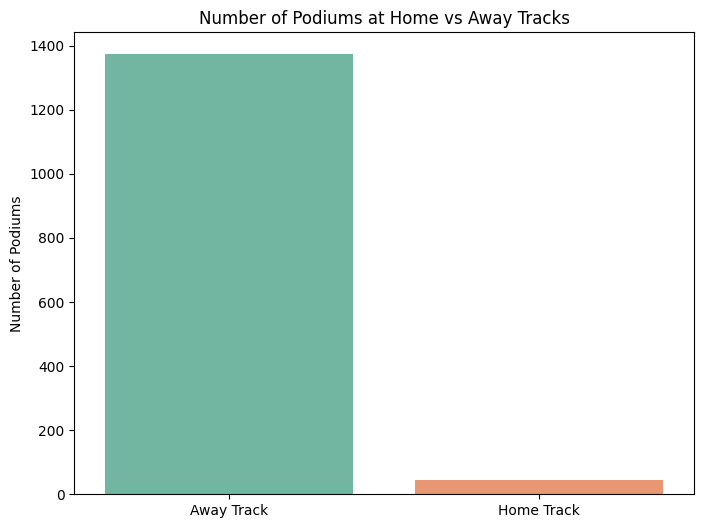

In [ ]:
# Visualization 1: Bar chart for podiums at home vs away tracks
plt.figure(figsize=(8, 6))
sns.barplot(data=home_vs_away_podiums, x='is_home_track', y='counts', palette='Set2')
plt.title('Number of Podiums at Home vs Away Tracks')
plt.xlabel('')
plt.ylabel('Number of Podiums')
plt.show()

<ipython-input-223-a3cec0ce4de6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_3_podiums, x='Driver_nationality', palette='Set3', order=top_3_podiums['Driver_nationality'].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dis

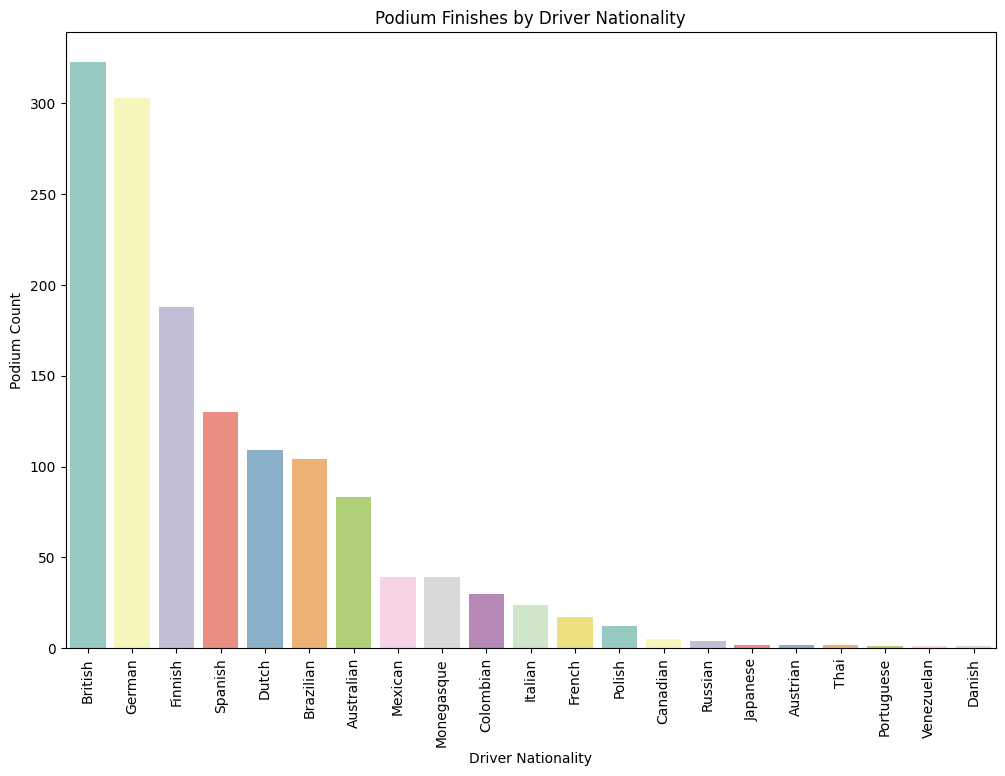

In [ ]:
# Visualization 2 : Plot the distribution of podium finishes by nationality
plt.figure(figsize=(12, 8))
sns.countplot(data=top_3_podiums, x='Driver_nationality', palette='Set3', order=top_3_podiums['Driver_nationality'].value_counts().index)
plt.title('Podium Finishes by Driver Nationality')
plt.xlabel('Driver Nationality')
plt.ylabel('Podium Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Extract home race and away race podium finishes
home_podium_positions = top_3_podiums[top_3_podiums['is_home_track'] == True]['position'].astype(int)
away_podium_positions = top_3_podiums[top_3_podiums['is_home_track'] == False]['position'].astype(int)

t_stat, p_value = stats.ttest_ind(home_podium_positions, away_podium_positions)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("There is a statistically significant difference between home and away podium finishes (p < 0.05).")
else:
    print("There is no statistically significant difference between home and away podium finishes (p ≥ 0.05).")

T-statistic: -2.021
P-value: 0.043
There is a statistically significant difference between home and away podium finishes (p < 0.05).
